In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# Reading the dataset
df = pd.read_excel('movie_reviews.xlsx')
df.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,86,140,64.0,11567.0


### 1. Find the number of movies that were released in theatres each year.
- There are some erroneous values in the data
- Visualize the number of movies each year and describe what you see
- Explain what assumptions and fixes you plan to make in the data as you move forward with your analysis


**Visualize the number of movies each year and describe what you see**
- Number of movies released gradually increased per year
- Movies released per year started peaking around 2000's with maximum movies released in 2014

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  critic_rating       16638 non-null  int64         
 13  critic_count        16638 non-null  int64     

In [127]:
df['in_theater_year'] = pd.to_datetime(df['in_theaters_date']).dt.year
movies_per_year = df['in_theater_year'].value_counts().sort_index()
movies_per_year = pd.DataFrame(movies_per_year).reset_index()
movies_per_year.rename(columns={'count' : 'release_count'}, inplace=True)
movies_per_year.head()

,in_theater_year,release_count
0,1930.0,9
1,1931.0,15
2,1932.0,13
3,1933.0,23
4,1934.0,16


In [128]:
movies_per_year[movies_per_year.release_count == movies_per_year.release_count.max()]

,in_theater_year,release_count
84,2014.0,744


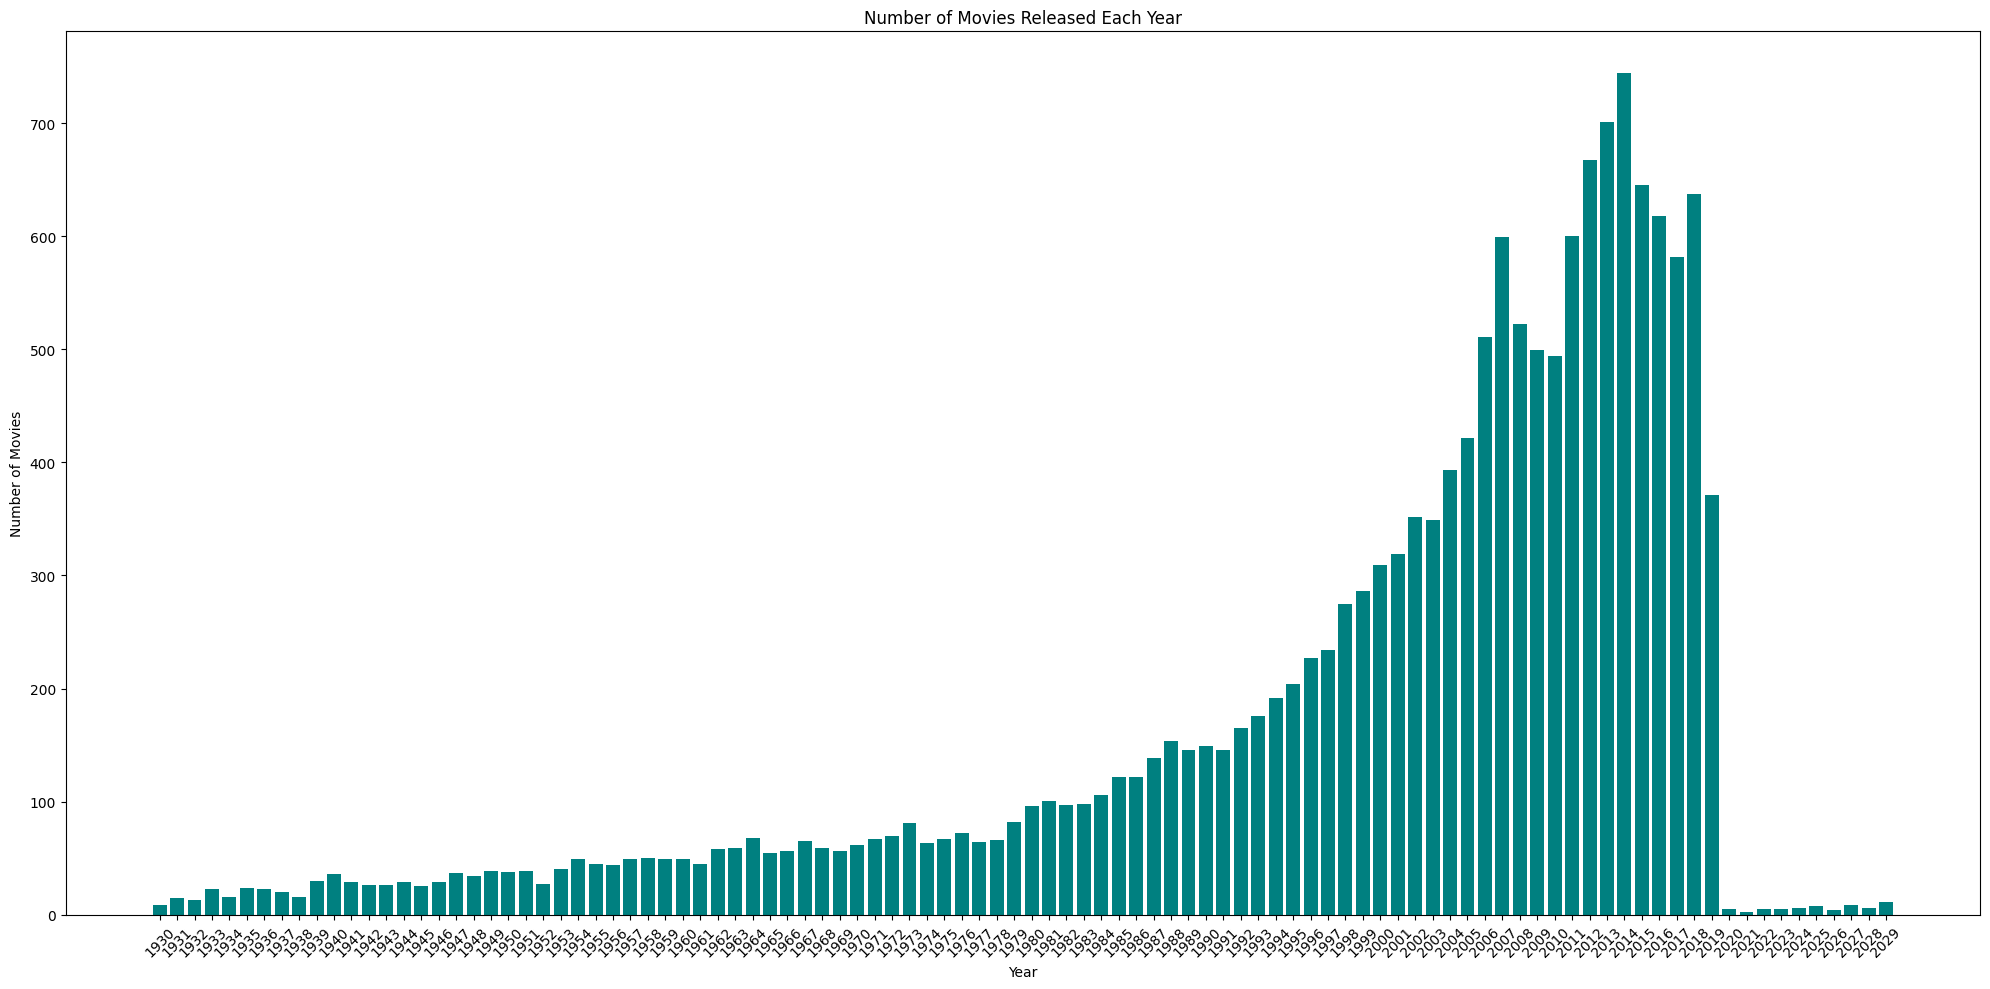

In [130]:
plt.figure(figsize=(20, 10))
plt.bar(movies_per_year['in_theater_year'].astype(int).astype(str), movies_per_year['release_count'], color='teal')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [131]:
df['stream_year'] = pd.to_datetime(df['on_streaming_date']).dt.year

In [132]:
sum(df[~df.in_theater_year.isnull()]['in_theater_year'] == df[~df.in_theater_year.isnull()]['stream_year'])

6051

### 2. Looking only at movies that were released in theatres before 2010:
- Find the 5 highest rated movies by critics (critic_rating)
- Find the 5 highest rated movies by the general audience (audience_rating)
- Take a look at the movie titles – these top movies don’t seem very popular

In [133]:
df_before_2k10 = df[df.in_theater_year < 2010]

In [134]:
top5_critic_rated = df_before_2k10.sort_values(by=['critic_rating', 'critic_count'], ascending=[False,False]).head(5)
top5_critic_rated[['movie_title', 'in_theaters_date']]

,movie_title,in_theaters_date
15415,Toy Story 2,1999-11-24
9462,Man on Wire,2008-01-22
13474,Taxi to the Dark Side,2007-04-28
15414,Toy Story,1995-11-22
4389,Citizen Kane,1941-05-01


In [135]:
top5_audience_rated = df_before_2k10.sort_values(by=['audience_rating','audience_count'], ascending=[False,False]).head(5)
top5_audience_rated[['movie_title', 'in_theaters_date']]

,movie_title,in_theaters_date
3196,Been Rich All My Life,2006-07-21
1288,La Ciudad (The City),1998-09-13
1800,Ice People,2008-04-26
215,Prima Ballerina,2009-01-16
12435,The Shawshank Redemption,1994-09-10


### 3. Create a new DataFrame containing only “popular” movies that were released in theatres before 2010.
- Assume popular movies are those with more audience reviews than the average number of audience reviews of all movies before 2010
- Find the 5 highest rated movies by critics (critic_rating)
- Find the 5 highest rated movies by the general audience (audience_rating)
- Take a look at the movie titles – these top movies should make more sense

In [136]:
df_before_2k10 = df[df.in_theater_year < 2010]
df_before_2k10.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count,in_theater_year,stream_year
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,68,22,53.0,14670.0,1979.0,1997.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,100,51,97.0,105000.0,1957.0,2001.0


In [137]:
average_audience_reviews = df_before_2k10['audience_count'].mean()
print(f"Average Audience Reviews for Movies before 2010 : {average_audience_reviews}")

Average Audience Reviews for Movies before 2010 : 246539.70603484032


In [138]:
df_pop_2k10 = df_before_2k10[df_before_2k10.audience_count >= average_audience_reviews]
df_pop_2k10.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count,in_theater_year,stream_year
5,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2008-06-24,109.0,Warner Bros. Pictures,8,148,37.0,411087.0,2008.0,2008.0
30,Ultraviolet,In the late 21st a disease called Hemophagia h...,An incomprehensible and forgettable sci-fi thr...,PG-13,"Action & Adventure, Drama, Horror, Science Fic...",Kurt Wimmer,Kurt Wimmer,"Milla Jovovich, Cameron Bright, Nick Chinlund,...",2006-03-03,2006-06-27,88.0,Sony Pictures,8,83,30.0,279966.0,2006.0,2006.0
50,Aliens,"Big-budget special effects, swiftly paced acti...","While Alien was a marvel of slow-building, atm...",R,"Action & Adventure, Horror, Science Fiction & ...",James Cameron,James Cameron,"Sigourney Weaver, Carrie Henn, Michael Biehn, ...",1986-07-18,1999-06-01,138.0,20th Century Fox,99,72,94.0,429158.0,1986.0,1999.0
84,The Happening,"""The Happening"" is a lightning-paced, heart-po...","The Happening begins with promise, but unfortu...",R,"Drama, Mystery & Suspense, Science Fiction & F...",M. Night Shyamalan,M. Night Shyamalan,"Mark Wahlberg, Zooey Deschanel, John Leguizamo...",2008-06-11,2008-10-07,90.0,20th Century Fox,18,179,24.0,370131.0,2008.0,2008.0
93,Disney's A Christmas Carol,Ebenezer Scrooge begins the Christmas holiday ...,Robert Zemeckis' 3-D animated take on the Dick...,PG,"Animation, Drama, Kids & Family, Science Ficti...",Robert Zemeckis,Robert Zemeckis,"Colin Firth, Leslie Zemeckis, Cary Elwes, Robi...",2009-11-06,2010-11-16,96.0,Walt Disney Studios,53,197,58.0,776113.0,2009.0,2010.0


In [139]:
top5_critic_rated_pop = df_pop_2k10.sort_values(by=['critic_rating', 'critic_count'], ascending=[False,False]).head(5)
top5_critic_rated_pop[['movie_title', 'in_theaters_date']]

,movie_title,in_theaters_date
15415,Toy Story 2,1999-11-24
15414,Toy Story,1995-11-22
13527,The Terminator,1984-10-26
11193,Pinocchio,1940-02-07
9587,Mary Poppins,1964-08-26


In [140]:
top5_audience_rated_pop = df_pop_2k10.sort_values(by=['audience_rating','audience_count'], ascending=[False,False]).head(5)
top5_audience_rated_pop[['movie_title', 'in_theaters_date']]

,movie_title,in_theaters_date
12435,The Shawshank Redemption,1994-09-10
6703,The Godfather,1972-03-24
5675,Star Wars: Episode V - The Empire Strikes Back,1980-06-20
834,GoodFellas,1990-09-19
12204,Schindler's List,1993-12-15


### 4. Using your new DataFrame (popular movies released in theatres before 2010), answer the following questions about the rating column:
- What percent of movies fall under each type of rating (R, PG-13, etc.)? What are your takeaways from the summary table?
- Create a visualization that shows for each rating (R, PG-13, etc.), the average critic rating and the average audience rating. What are your takeaways from the visualization?


**What percent of movies fall under each type of rating (R, PG-13, etc.)? What are your takeaways from the summary table?**

- PG-13: Most common, appealing to a broad audience while containing moderate content.
- R: Second most common, catering to adults with mature themes.
- PG: Less common, suggesting a narrower market for family films with some mature content.
- G: Rare, indicating limited production of content suitable for all ages.
- NR: Nearly nonexistent, showing the rarity of films outside the standard rating system.

***Conclusion*** : The mot popular movies before 2010 contain contents not suitable for teenagers below 17 and 13 years. 

**Create a visualization that shows for each rating (R, PG-13, etc.), the average critic rating and the average audience rating. What are your takeaways from the visualization?**

- **G-Rated Films**: Highest ratings, indicating universal appeal and family-oriented content.
- **R-Rated Films**: Audience ratings exceed critic ratings, reflecting a preference for mature content among viewers.
- **PG-13 Films**: More popular with audiences, especially with teens and young adults.
- **PG Films**: Balanced ratings, suggesting content that is suitable for a wider age range.
- **NR (Not Rated) Films**: Lowest ratings, likely due to niche appeal or less mainstream availability

In [141]:
df_pop_2k10['rating'].unique()

array(['PG-13', 'R', 'PG', 'G', 'NR'], dtype=object)

In [142]:
sum(df_pop_2k10.rating.isnull())

0

In [143]:
total_pop_movies = df_pop_2k10.shape[0]
pop_movies_rating = df_pop_2k10.rating.value_counts().reset_index()
pop_movies_rating.rename(columns={'count' : 'movie_count'},inplace=True)
pop_movies_rating['movie_percent'] = pop_movies_rating['movie_count'].apply(lambda x : round(x / total_pop_movies * 100,2))
pop_movies_rating

,rating,movie_count,movie_percent
0,PG-13,415,41.62
1,R,322,32.30
2,PG,195,19.56
3,G,64,6.42
4,NR,1,0.10


In [144]:
rating_dist = df_pop_2k10.groupby('rating')[['critic_rating', 'audience_rating']].mean().reset_index().sort_values(by=['critic_rating'])
rating_dist

,rating,critic_rating,audience_rating
1,NR,36.000000,41.000000
3,PG-13,49.173494,62.590361
2,PG,59.266667,65.266667
4,R,61.832298,71.270186
0,G,77.765625,74.781250


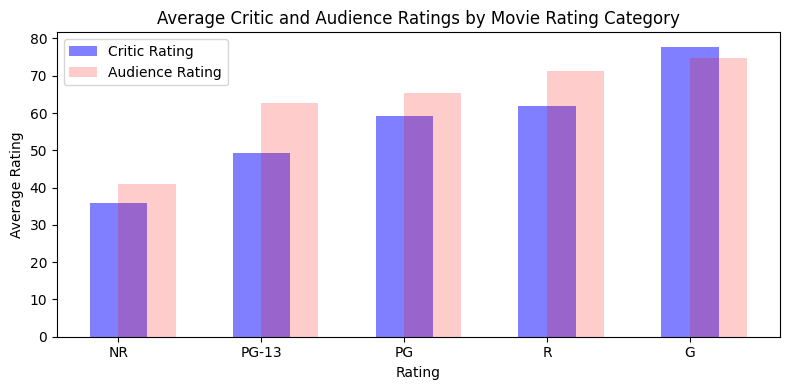

In [145]:
plt.figure(figsize=(8, 4))

# Plotting both critic and audience ratings
width = 0.4  # the width of the bars
r = range(len(rating_dist))

plt.bar(r, rating_dist['critic_rating'], color='blue', width=width, label='Critic Rating', align='center', alpha=0.5)
plt.bar(r, rating_dist['audience_rating'], color='red', width=width, label='Audience Rating', align='edge', alpha=0.2)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xlabel('Rating')
plt.ylabel('Average Rating')
plt.title('Average Critic and Audience Ratings by Movie Rating Category')
plt.xticks(r, rating_dist['rating'])
plt.legend()
plt.tight_layout()
plt.show()